In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/internship_data.csv")
df.head()

,cgpa,num_projects,dsa_level,tech_stack_count,hackathon,shortlisted
0,8.54,3,3,4,0,1
1,6.39,3,0,6,0,0
2,7.33,4,0,2,0,0
3,8.71,4,1,1,0,1
4,7.16,3,3,3,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cgpa              200 non-null    float64
 1   num_projects      200 non-null    int64  
 2   dsa_level         200 non-null    int64  
 3   tech_stack_count  200 non-null    int64  
 4   hackathon         200 non-null    int64  
 5   shortlisted       200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [4]:
df["shortlisted"].value_counts()

shortlisted
1    118
0     82
Name: count, dtype: int64

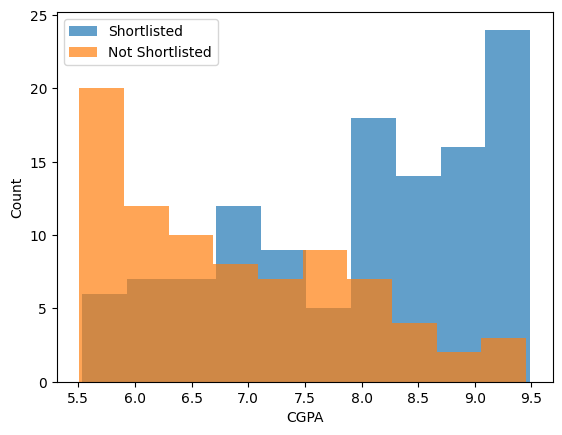

In [5]:
plt.hist(df[df["shortlisted"] == 1]["cgpa"], bins=10, alpha=0.7, label="Shortlisted")
plt.hist(df[df["shortlisted"] == 0]["cgpa"], bins=10, alpha=0.7, label="Not Shortlisted")
plt.xlabel("CGPA")
plt.ylabel("Count")
plt.legend()
plt.show()


In [6]:
df.groupby("shortlisted").mean()

,cgpa,num_projects,dsa_level,tech_stack_count,hackathon
shortlisted,,,,,
0,6.848171,1.609756,0.719512,3.256098,0.341463
1,7.974492,2.669492,1.881356,3.576271,0.550847


In [7]:
X = df.drop("shortlisted", axis=1)
y = df["shortlisted"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((160, 5), (40, 5))

In [14]:
y_train.shape, y_test.shape

((160,), (40,))

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7


In [18]:
from sklearn.metrics import accuracy_score

train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print("Train accuracy: ", train_acc)

test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print("Test accuracy: ", test_acc)


Train accuracy:  1.0
Test accuracy:  0.7


In [23]:
from sklearn.tree import DecisionTreeClassifier

model_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
model_limited.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [27]:
from sklearn.metrics import accuracy_score

train_pred_limited = model_limited.predict(X_train)
train_acc_limited = accuracy_score(y_train, train_pred_limited)
print("Train accuracy: ", train_acc_limited)

test_pred_limited = model_limited.predict(X_test)
test_acc_limited = accuracy_score(y_test, test_pred_limited)
print("Test accuracy: ", test_acc_limited)

Train accuracy:  0.94375
Test accuracy:  0.75


In [28]:
import pandas as pd

importance = pd.Series(
    model_limited.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance

dsa_level           0.359987
cgpa                0.287236
num_projects        0.250117
hackathon           0.088585
tech_stack_count    0.014076
dtype: float64

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    random_state=42
)

rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [31]:
from sklearn.metrics import accuracy_score

rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))

rf_train_acc, rf_test_acc

(0.96875, 0.825)

In [41]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Decision Tree", "Decision Tree (Tuned)", "Random Forest"],
    "Train Accuracy": [train_acc , train_acc_limited, rf_train_acc],
    "Test Accuracy": [test_acc, test_acc_limited, rf_test_acc]
})

results

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,1.00000,0.700
1,Decision Tree (Tuned),0.94375,0.750
2,Random Forest,0.96875,0.825


In [43]:
import joblib

joblib.dump(rf_model, "model/model.pkl")

['model/model.pkl']